# Conformal Lattice: Implicit Unit

ImplictLattice function allows to use a iso-surface function to define lattice unit inside a 1x1x1 bounding box. The geometry will be trimed at box boundary and arrayed into the lattice grid and re-voxelized, eventually producing a water-tight lattice mesh.

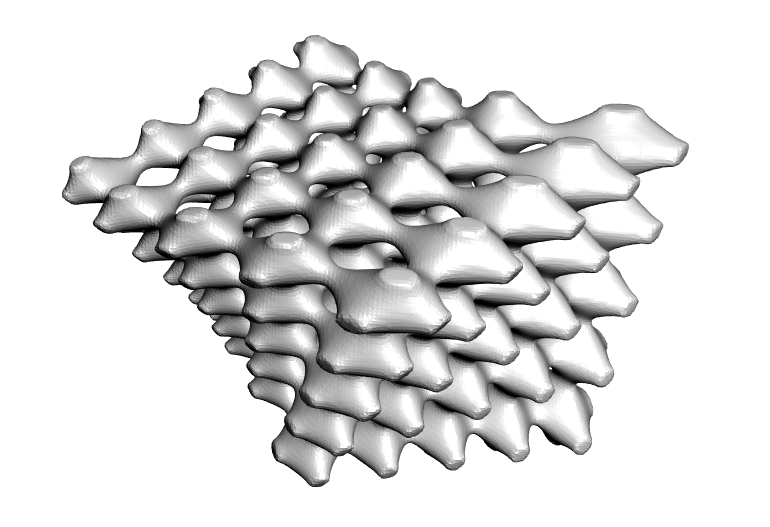

In [4]:
import genysis 
token = "REPLACE_WITH_YOUR_TOKEN"

In [5]:
# upload stp surfaces needed for conformal lattice grid
genysis.upload('models/top.stp','top.stp',token)
genysis.upload('models/bottom.stp','bottom.stp',token)
genysis.upload('models/side1.stp','side1.stp',token)
genysis.upload('models/side2.stp','side2.stp',token)
# visualization of stp and iges format will be supported soon

('uploading file size:', 0.006, 'MB')
[====================================================]105%
successfully uploaded models/top.stp as top.stp
('uploading file size:', 0.006, 'MB')
[====================================================]105%
successfully uploaded models/bottom.stp as bottom.stp
('uploading file size:', 0.006, 'MB')
[====================================================]105%
successfully uploaded models/side1.stp as side1.stp
('uploading file size:', 0.006, 'MB')
[====================================================]105%
successfully uploaded models/side2.stp as side2.stp


{u'message': u'side2.stp uploaded to test@test.com/side2.stp'}

In [6]:
# create a 6x6x6 conformal grid 
conformalLattice = genysis.conformalLattice()
conformalLattice.setSurfaces(top='top.stp',bottom='bottom.stp',side1='side1.stp',side2='side2.stp')
conformalLattice.setUVW(6,6,6)
conformalLattice.setGridOutput("6x6x6_grid.json")
conformalLattice.genGrid(token)
genysis.visualize("6x6x6_grid.json",token,True)

('request: ', '{"bottom": "bottom.stp", "top": "top.stp", "filename": "6x6x6_grid.json", "u": 6, "t": "REPLACE_WITH_YOUR_TOKEN", "w": 6, "v": 6, "output": "6x6x6_grid.json", "side2": "side2.stp", "side1": "side1.stp"}')
('response: ', u'["6x6x6_grid.json"]\n')
https://studiobitonti.appspot.com/apps/visualize?name=6x6x6_grid.json&t=REPLACE_WITH_YOUR_TOKEN


'https://studiobitonti.appspot.com/apps/visualize?name=6x6x6_grid.json&t=REPLACE_WITH_YOUR_TOKEN'

In [7]:
# an example of symmetrical lattice unit using iso-surface function
conformalLattice.setOutput('implicit1.stl')
conformalLattice.implicitLattice(
    
    # a pythonic function for iso surface where negative values represent inside of surface and positive one represent outside
    # the surface is generated where iso values equals to zero
    "0.6-(math.cos((x-0.5)*2*math.pi)+math.cos((y-0.5)*2*math.pi)+math.cos((z-0.5)*2*math.pi))",
    token,
    
    # OTHER OPTIONAL PARAMETERS:
    # smooth = 1 # average the voxel field to avoid the aliasing with sharp edges, default value is 2
    # resolution = 256 # the resolution for the voxelization of final lattice geometry,by default 256
    # unit_resolution = 16 # the resolution for the voxelization of unit geometry, by default 16
    
)
genysis.visualize('implicit1.stl',token,True)

('request: ', '{"function": "0.6-(math.cos((x-0.5)*2*math.pi)+math.cos((y-0.5)*2*math.pi)+math.cos((z-0.5)*2*math.pi))", "output": "implicit1.stl", "grid": "6x6x6_grid.json", "t": "REPLACE_WITH_YOUR_TOKEN"}')
('response: ', u'"implicit1.stl"\n')
https://studiobitonti.appspot.com/apps/visualize?name=implicit1.stl&t=REPLACE_WITH_YOUR_TOKEN


'https://studiobitonti.appspot.com/apps/visualize?name=implicit1.stl&t=REPLACE_WITH_YOUR_TOKEN'

In [8]:
# another example of one-eighth-sphere unit 
conformalLattice.setOutput('implicit2.stl')
conformalLattice.implicitLattice(
    
    "math.sqrt(x**2+y**2+z**2)-1",
    token,
    smooth = 5
    
)
genysis.visualize('implicit2.stl',token,True)

('request: ', '{"function": "math.sqrt(x**2+y**2+z**2)-1", "grid": "6x6x6_grid.json", "smooth": 5, "t": "REPLACE_WITH_YOUR_TOKEN", "output": "implicit2.stl"}')
('response: ', u'"implicit2.stl"\n')
https://studiobitonti.appspot.com/apps/visualize?name=implicit2.stl&t=REPLACE_WITH_YOUR_TOKEN


'https://studiobitonti.appspot.com/apps/visualize?name=implicit2.stl&t=REPLACE_WITH_YOUR_TOKEN'